# Exploratory Data Analysis and visualization on FIFA 2021

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import re

In [ ]:
# load dataset
df=pd.read_csv('/content/drive/My Drive/datasets/FIFA21_official_data.csv')
df.head()
df2 =df

In [ ]:
df.shape

(17108, 65)

## Data Preprocessing

In [ ]:
df.columns 

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Best Position', 'Best Overall Rating', 'Release Clause',
       'DefensiveAwareness'],
      dtype='object')

In [ ]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,€31.5M,€115K,2316,Right,5.0,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,6'0,190lbs,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,€87M,€370K,2304,Right,4.0,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,€63M,€195K,2303,Right,2.0,4.0,4.0,High/ High,Lean (170-185),Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,5'10,152lbs,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,86.0,NaN,67.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,€50.5M,€290K,2288,Left,4.0,3.0,4.0,Medium/ Medium,PLAYER_BODY_TYPE_266,Yes,"<span class=""pos pos23"">RW",7.0,"Jul 12, 2019",NaN,2024,5'9,161lbs,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,89.0,NaN,54.0,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,€22M,€41K,2280,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,5'8,152lbs,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,NaN,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


In [ ]:
# converting Value and Wage column to number
df["Value_int"]=df["Value"].str[1:]
df["Wage_int"]=df["Wage"].str[1:]
df['Value_int']=df['Value_int'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df['Wage_int']=df['Wage_int'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True).map(pd.eval).astype(int)
df.sample()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_int,Wage_int
3616,241117,Borja Sánchez,24,https://cdn.sofifa.com/players/241/117/20_60.png,Spain,https://cdn.sofifa.com/flags/es.png,73,80,Real Oviedo,https://cdn.sofifa.com/teams/110827/light_30.png,€5.5M,€9K,1837,Right,1.0,4.0,4.0,Medium/ Medium,Lean (185+),No,"<span class=""pos pos16"">LM",10.0,"Jul 13, 2018",NaN,2022,6'1,176lbs,69.0,68.0,50.0,73.0,65.0,75.0,71.0,70.0,71.0,74.0,79.0,75.0,80.0,69.0,65.0,68.0,62.0,70.0,65.0,70.0,58.0,36.0,69.0,73.0,55.0,71.0,NaN,35.0,36.0,12.0,13.0,11.0,6.0,7.0,CAM,75.0,€9.9M,37.0,5500000,9000


In [ ]:
# converting height to centimeters
df['Height'] = df['Height'].replace({"'":"."},regex =True).map(pd.eval).astype(float)*30.48
#  Converting Weight to kg
df['Weight'] = df['Weight'].str[:-3]
df['Weight'] = df['Weight'].astype(float)*.4535
df['Height']= df['Height'].round(decimals = 2)
df['Weight'] = df['Weight'].round(decimals = 2)

In [ ]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_int,Wage_int
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,€31.5M,€115K,2316,Right,5.0,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,Yes,"<span class=""pos pos24"">RS",9.0,"Sep 25, 2020",NaN,2022,182.88,86.16,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0,31500000,115000
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,€87M,€370K,2304,Right,4.0,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,Yes,"<span class=""pos pos13"">RCM",17.0,"Aug 30, 2015",NaN,2023,155.75,69.84,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,NaN,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0,87000000,370000
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,€63M,€195K,2303,Right,2.0,4.0,4.0,High/ High,Lean (170-185),Yes,"<span class=""pos pos18"">CAM",18.0,"Jan 30, 2020",NaN,2025,155.45,68.93,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,86.0,NaN,67.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0,63000000,195000
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,€50.5M,€290K,2288,Left,4.0,3.0,4.0,Medium/ Medium,PLAYER_BODY_TYPE_266,Yes,"<span class=""pos pos23"">RW",7.0,"Jul 12, 2019",NaN,2024,179.83,73.01,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,89.0,NaN,54.0,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0,50500000,290000
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,€22M,€41K,2280,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,"<span class=""pos pos7"">LB",19.0,"Sep 14, 2020",NaN,2024,176.78,68.93,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,NaN,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0,22000000,41000


In [ ]:
# drop urls
df.drop(['Photo', 'Club Logo','Flag','Position'], axis=1, inplace=True)

In [ ]:
#Checking for  missing values
df[df.columns[df.isna().any()]].isna().sum()

Club                      325
Body Type                  25
Real Face                  25
Jersey Number              20
Joined                   1449
Loaned From             16186
Contract Valid Until      496
Volleys                    39
Curve                      39
Agility                    39
Balance                    39
Jumping                    39
Interceptions               3
Positioning                 3
Vision                     39
Composure                 287
Marking                 16166
SlidingTackle              39
Release Clause           1629
DefensiveAwareness        942
dtype: int64

In [ ]:
# remove null values
df.drop(['Marking', 'Loaned From','Real Face'], axis=1, inplace=True)

In [ ]:
df['Club'].fillna('No Club', inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Joined'].fillna('Oct 9, 2020', inplace = True)
df['Contract Valid Until'].fillna(2021, inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['Agility'].fillna(df['Agility'].mean(), inplace = True)
df['Balance'].fillna(df['Balance'].mean(), inplace = True)
df['Jumping'].fillna(df['Jumping'].mean(), inplace = True)
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace = True)
df['Positioning'].fillna(df['Positioning'].mean(), inplace = True)
df['Vision'].fillna(df['Vision'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)

In [ ]:
df['Composure'].unique()

array([85., 91., 86., 89., 87., 78., 81., 84., 83., 88., 82., 92., 80.,
       90., 96., 95., nan, 75., 74., 93., 79., 77., 94., 72., 76., 70.,
       69., 67., 65., 73., 71., 60., 64., 68., 66., 62., 58., 63., 57.,
       61., 54., 59., 56., 52., 55., 50., 51., 53., 46., 49., 47., 48.,
       40., 45., 44., 43., 42., 41., 39., 38., 37., 36., 35., 34., 31.,
       32., 30., 33., 21., 14., 28., 27., 19., 25., 26., 24., 29., 18.,
       17., 23., 12., 22., 13., 20.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        17108 non-null  int64  
 1   Name                      17108 non-null  object 
 2   Age                       17108 non-null  int64  
 3   Nationality               17108 non-null  object 
 4   Overall                   17108 non-null  int64  
 5   Potential                 17108 non-null  int64  
 6   Club                      17108 non-null  object 
 7   Value                     17108 non-null  object 
 8   Wage                      17108 non-null  object 
 9   Special                   17108 non-null  int64  
 10  Preferred Foot            17108 non-null  object 
 11  International Reputation  17108 non-null  float64
 12  Weak Foot                 17108 non-null  float64
 13  Skill Moves               17108 non-null  float64
 14  Work R

In [ ]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Overall Rating,DefensiveAwareness,Value_int,Wage_int
count,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,16821.000000,17108.000000,17069.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,17108.000000,16166.000000,1.710800e+04,17108.000000
mean,221421.276187,25.053718,66.780161,72.553542,1625.722995,1.147533,2.981938,2.446107,20.741232,176.735936,75.048908,51.360065,47.719722,53.322072,60.289747,44.729217,57.668284,49.280919,44.049918,54.068623,60.395663,65.402034,65.413023,64.437343,62.693184,64.630148,59.481880,64.961216,63.121054,65.079904,48.790274,56.675532,46.818065,52.109851,55.271076,49.991992,59.634088,48.101473,45.933271,15.660744,15.529928,15.469839,15.550853,15.771510,67.753799,47.014475,2.566142e+06,10458.852584
std,36028.786065,4.915963,7.019069,5.738347,263.503922,0.455773,0.674699,0.780278,17.190064,13.707263,7.118936,17.954050,19.456040,17.034499,14.076104,17.733391,18.157036,18.204293,17.472238,14.972201,16.037391,14.708339,14.456563,14.367685,9.209469,14.001704,13.435733,11.906517,15.378189,12.670590,19.145741,17.100188,20.922399,19.171296,13.701092,15.730404,11.912131,21.532834,21.213315,16.910205,16.212333,15.977547,16.448905,17.209624,6.773192,20.152543,5.376581e+06,21116.364142
min,2.000000,16.000000,38.000000,46.000000,731.000000,1.000000,1.000000,1.000000,1.000000,155.450000,49.890000,6.000000,3.000000,5.000000,7.000000,4.000000,5.000000,4.000000,5.000000,9.000000,5.000000,12.000000,11.000000,14.000000,24.000000,17.000000,12.000000,22.000000,11.000000,16.000000,4.000000,9.000000,4.000000,2.000000,10.000000,7.000000,12.000000,5.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,42.000000,3.000000,0.000000e+00,0.000000
25%,205451.750000,21.000000,62.000000,69.000000,1484.000000,1.000000,3.000000,2.000000,9.000000,155.750000,69.840000,40.000000,32.000000,45.000000,55.000000,32.000000,52.000000,37.000000,32.000000,45.000000,56.000000,58.000000,59.000000,57.000000,57.000000,57.000000,50.000000,58.000000,56.000000,58.000000,35.000000,45.000000,26.000000,43.000000,46.000000,40.000000,52.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,63.000000,29.000000,3.750000e+05,1000.000000
50%,230441.000000,24.000000,67.000000,72.000000,1653.000000,1.000000,3.000000,2.000000,18.000000,179.830000,74.830000,55.000000,52.000000,56.000000,63.000000,46.000000,63.000000,51.000000,42.000000,57.000000,64.000000,68.000000,68.000000,67.000000,63.000000,67.000000,61.000000,66.000000,66.000000,66.000000,53.000000,59.000000,52.000000,57.000000,57.000000,51.000000,60.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,68.000000,52.000000,8.000000e+05,3000.000000
75%,245402.500000,28.000000,72.000000,76.000000,1810.000000,1.000000,3.000000,3.000000,27.000000,185.930000,79.820000,65.000000,63.000000,65.000000,69.000000,58.000000,70.000000,63.000000,58.000000,65.000000,70.000000,75.000000,75.000000,74.000000,69.000000,74.000000,70.000000,73.000000,73.000000,74.000000,64.000000,70.000000,65.000000,66.000000,65.000000,61.000000,68.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.0

In [ ]:
df.head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_int,Wage_int
0,176580,L. Suárez,33,Uruguay,87,87,Atlético Madrid,€31.5M,€115K,2316,Right,5.0,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,9.0,"Sep 25, 2020",2022,182.88,86.16,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0,31500000,115000
1,192985,K. De Bruyne,29,Belgium,91,91,Manchester City,€87M,€370K,2304,Right,4.0,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,17.0,"Aug 30, 2015",2023,155.75,69.84,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0,87000000,370000
2,212198,Bruno Fernandes,25,Portugal,87,90,Manchester United,€63M,€195K,2303,Right,2.0,4.0,4.0,High/ High,Lean (170-185),18.0,"Jan 30, 2020",2025,155.45,68.93,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,86.0,67.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0,63000000,195000
3,194765,A. Griezmann,29,France,87,87,FC Barcelona,€50.5M,€290K,2288,Left,4.0,3.0,4.0,Medium/ Medium,PLAYER_BODY_TYPE_266,7.0,"Jul 12, 2019",2024,179.83,73.01,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0,50500000,290000
4,224334,M. Acuña,28,Argentina,83,83,Sevilla FC,€22M,€41K,2280,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),19.0,"Sep 14, 2020",2024,176.78,68.93,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0,22000000,41000


In [ ]:
skills=[]
for i in df.columns:
    skills.append(i)
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Jersey Number                  0
Joined                         0
Contract Valid Until           0
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallContro

## Analysis and Visualizations

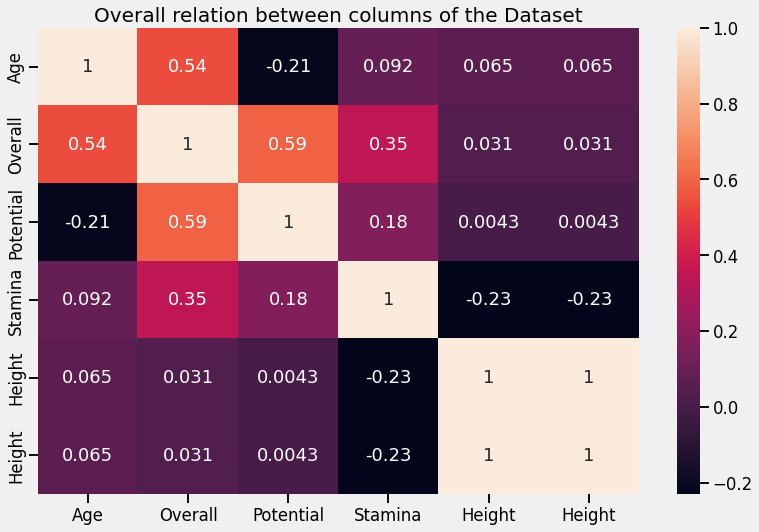

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['Age', 'Nationality', 'Overall', 'Potential', 'Club','Stamina','Height','Height']].corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

In [ ]:
# number of countries from which Fifa 21 players are selected 
df.Nationality.nunique()

169

In [ ]:
df.Nationality.value_counts().head(10)

England        1730
Germany        1166
Spain          1106
France          997
Brazil          811
Argentina       772
Italy           559
Netherlands     460
Mexico          369
Portugal        368
Name: Nationality, dtype: int64

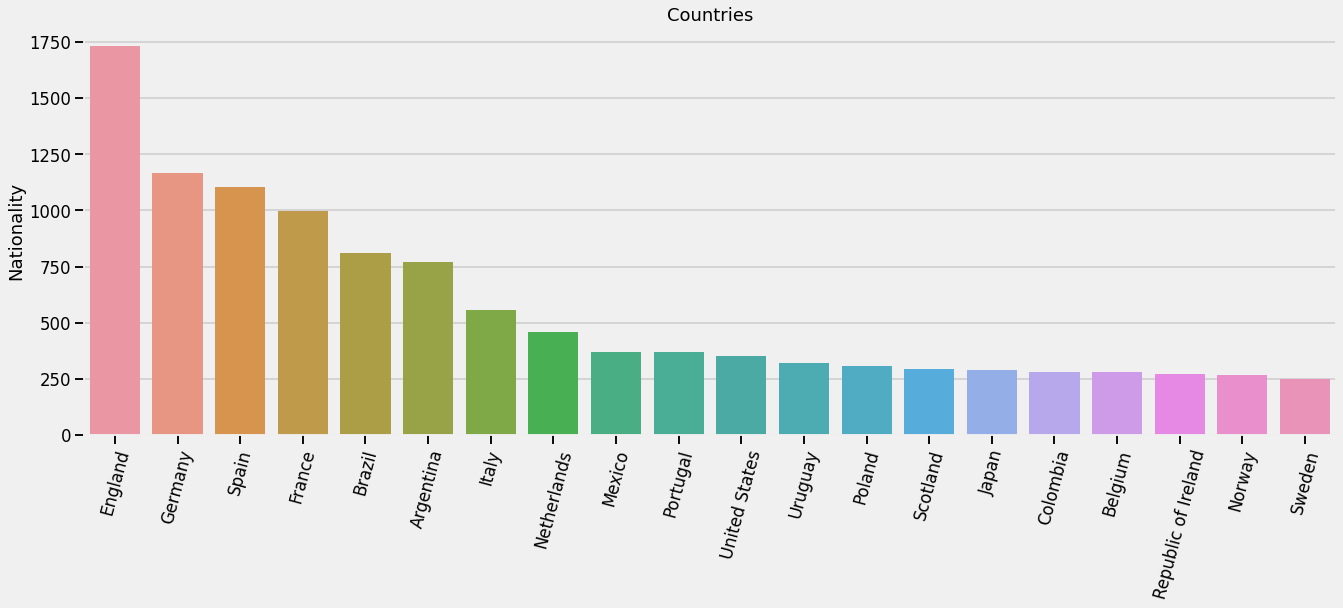

In [ ]:
#bar graph of top 20 countries with maximum number of players
countries = df.Nationality.value_counts().head(20)
plt.figure(figsize=(20,7))
plt.xticks(rotation=75)
plt.title("Countries")
sns.barplot(countries.index, countries);

In [ ]:
# number of clubs
df.Club.nunique()

844

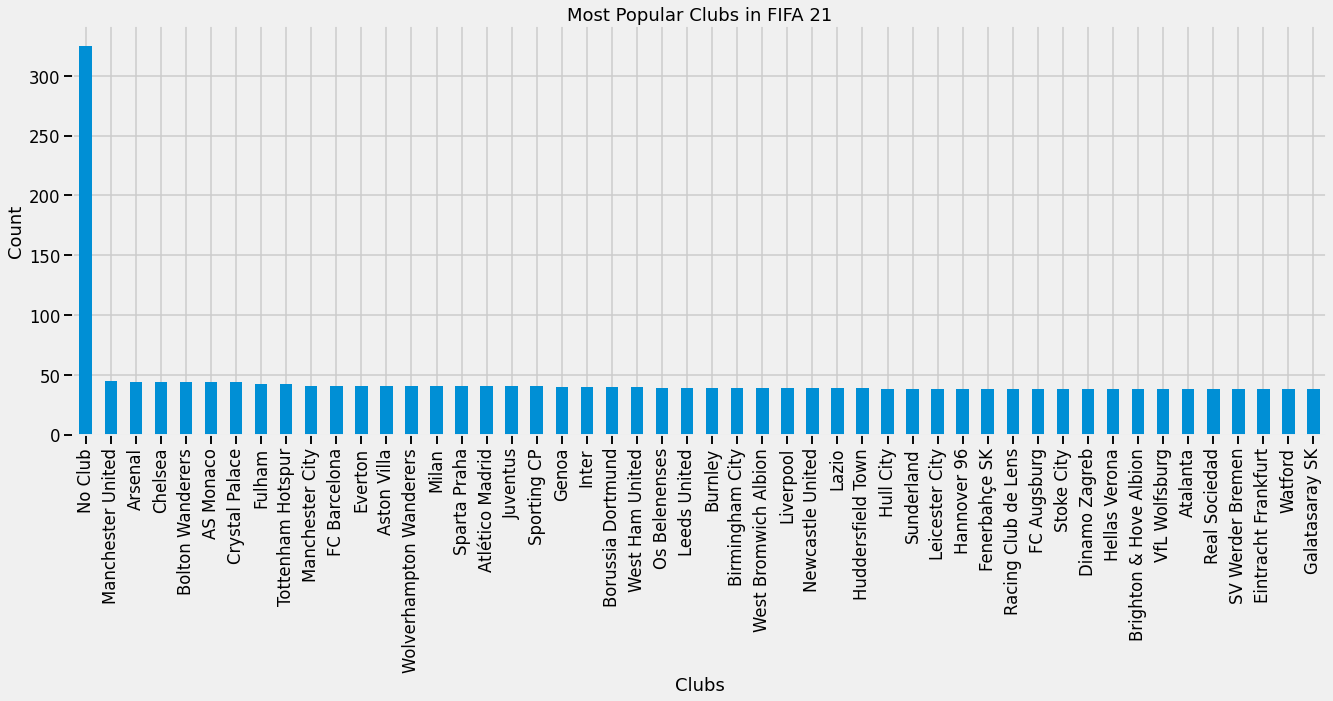

In [ ]:
 #popular clubs in FIFA-2021
plt.figure(figsize = (20,7))
df['Club'].value_counts().head(50).plot.bar()
plt.title('Most Popular Clubs in FIFA 21')
plt.xlabel('Clubs')
plt.ylabel('Count')
plt.show()

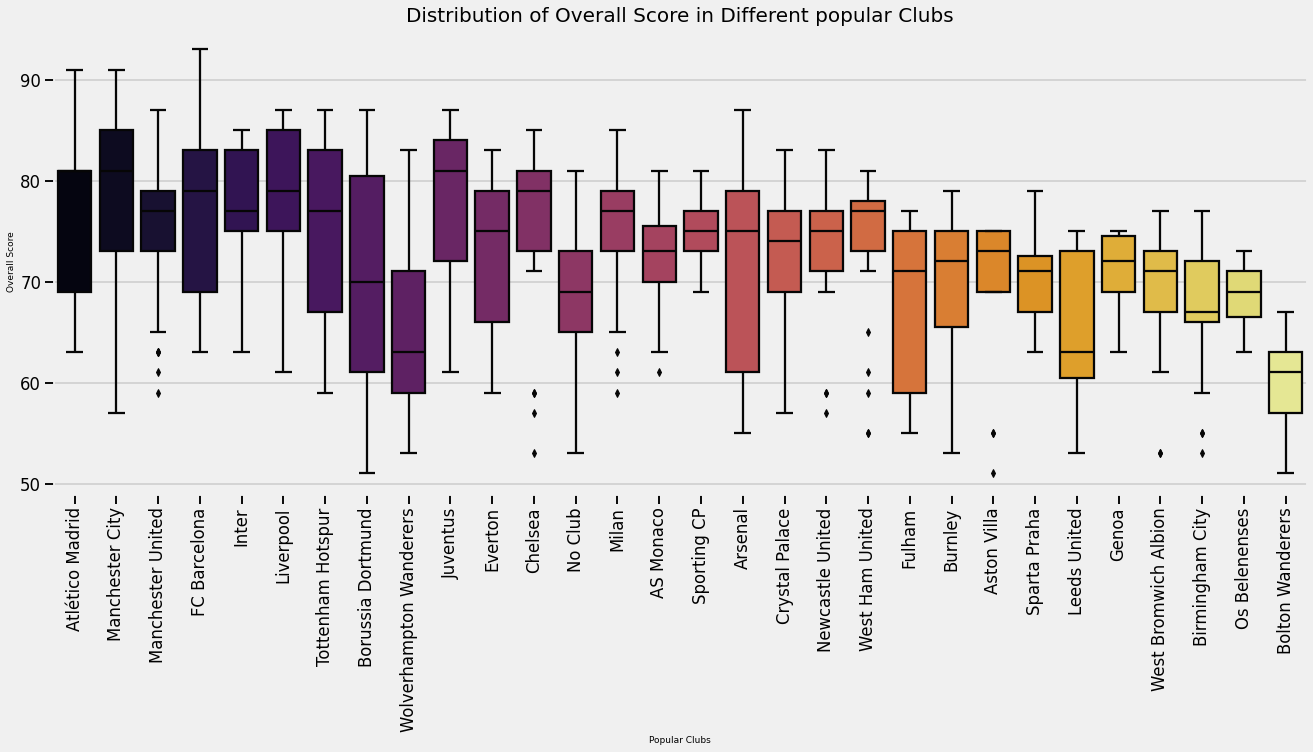

In [ ]:
clubs = df['Club'].value_counts().head(30).index.tolist()

df_clubs = df.loc[df['Club'].isin(clubs) & df['Overall']]

plt.rcParams['figure.figsize'] = (20, 8)
ax = sns.boxplot(x = df_clubs['Club'], y = df_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

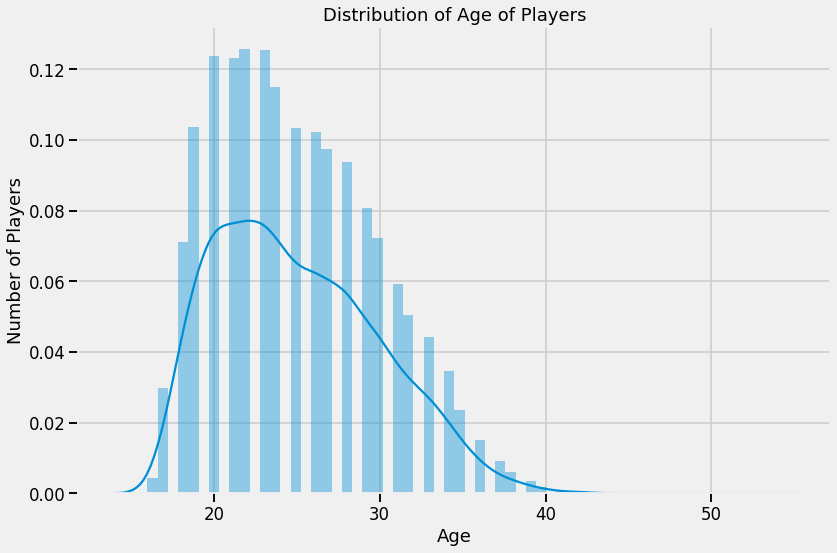

In [ ]:
#checking the age distribution of the players in FIFA-2021
plt.figure(figsize = (12,8))
ax = sns.distplot(df['Age'],bins = 60,kde = True)
ax.set_ylabel('Number of Players')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age of Players')
plt.show()

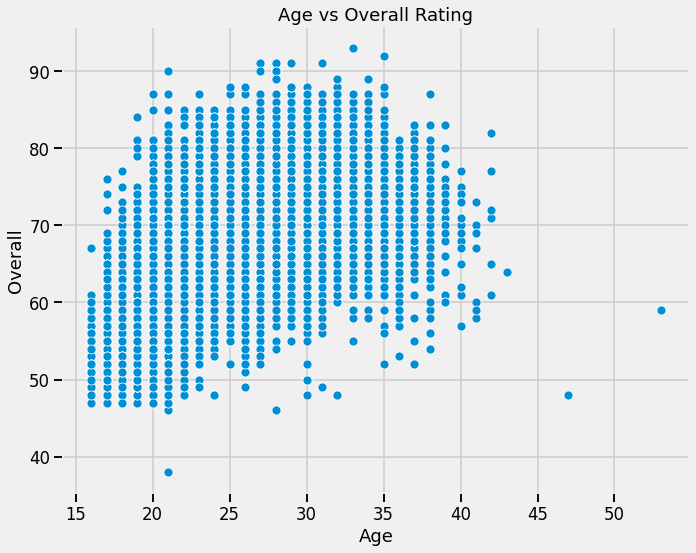

In [ ]:
#Scatterplot of overall vs age 
plt.figure(figsize=(10,8))
plt.title('Age vs Overall Rating')
sns.scatterplot(df.Age, df.Overall);

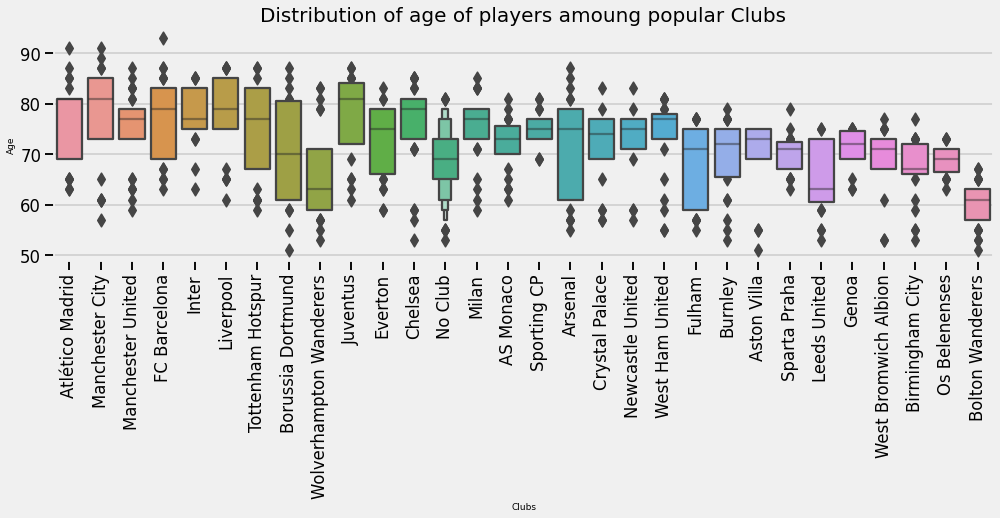

In [ ]:
# Distribution of ages in popular clubs
df_clubs = df.loc[df['Club'].isin(clubs) & df['Overall']]

plt.rcParams['figure.figsize'] = (15, 4)
ax = sns.boxenplot(x = df_clubs['Club'], y = df_clubs['Overall'])
ax.set_xlabel(xlabel = 'Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Age', fontsize = 9)
ax.set_title(label = 'Distribution of age of players amoung popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Top 15 players with the highest overall rating in Fifa 21 
df.sort_values(by=['Overall'],ascending=False)[['Name', 'Age','Nationality', 'Overall']].head(15)

,Name,Age,Nationality,Overall
18,L. Messi,33,Argentina,93
22,Cristiano Ronaldo,35,Portugal,92
70,Neymar Jr,28,Brazil,91
1,K. De Bruyne,29,Belgium,91
44,R. Lewandowski,31,Poland,91
14060,J. Oblak,27,Slovenia,91
31,M. Salah,28,Egypt,90
38,S. Mané,28,Senegal,90
122,K. Mbappé,21,France,90
204,V. van Dijk,28,Netherlands,90


In [ ]:
#  Top 10 fastest players in FIFA 2021
df[["Acceleration","Name","Best Position","Age","Nationality","SprintSpeed"]].nlargest(7, ["Acceleration"]).set_index("Name")

,Acceleration,Best Position,Age,Nationality,SprintSpeed
Name,,,,,
Adama Traoré,97.0,RM,24,Spain,96.0
K. Mbappé,96.0,ST,21,France,96.0
A. Davies,96.0,LB,19,Canada,96.0
R. Sterling,96.0,LW,25,England,90.0
D. James,96.0,RM,22,Wales,95.0
M. Diaby,96.0,LM,20,France,90.0
J. Doku,96.0,RW,18,Belgium,91.0


In [ ]:
# Top tallest players
df[["Height","Name","Weight","Best Position","Age","Nationality"]].nlargest(10, ["Height"]).set_index("Name")


,Height,Weight,Best Position,Age,Nationality
Name,,,,,
T. Holý,210.31,102.04,GK,28,Czech Republic
20 J. Samnik,210.31,81.18,GK,18,United States
15 N. Žigić,207.26,96.14,ST,33,Serbia
S. Maierhofer,207.26,97.96,ST,37,Austria
20 L. Traoré,207.26,87.07,ST,28,Ivory Coast
M. Qvist,207.26,93.87,CB,27,Denmark
A. Ba,207.26,93.87,CB,26,Mauritania
V. Milinković-Savić,207.26,92.06,GK,23,Serbia
20 M. Casey,207.26,79.82,CB,19,England


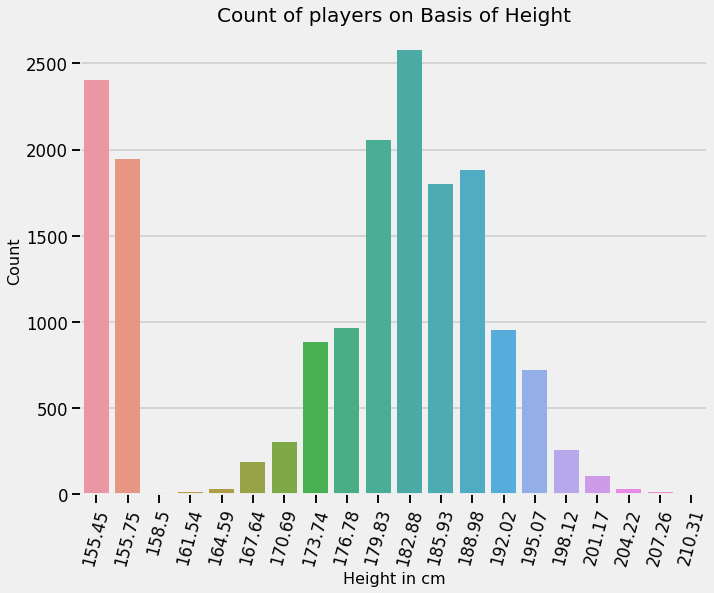

In [ ]:
plt.figure(figsize = (10 , 8))
ax = sns.countplot(x = 'Height', data = df[['Height']])
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in cm', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.xticks(rotation=75)
plt.show()

In [ ]:
# best playesrs in defence
df[["DefensiveAwareness","Name","Best Position",'Age','Nationality']].nlargest(10, ['DefensiveAwareness']).set_index('Name')

,DefensiveAwareness,Best Position,Age,Nationality
Name,,,,
G. Chiellini,94.0,CB,35,Italy
V. van Dijk,93.0,CB,28,Netherlands
M. Škriniar,92.0,CB,25,Slovakia
K. Koulibaly,91.0,CB,29,Senegal
20 D. De Rossi,90.0,CB,35,Italy
M. Hummels,90.0,CB,31,Germany
L. Bonucci,90.0,CB,33,Italy
C. Lenglet,90.0,CB,25,France
D. Godín,90.0,CB,34,Uruguay


In [ ]:
# Most paid players
df[["Wage_int","Name","Value","Best Overall Rating","Age","Nationality","Potential","International Reputation"]].nlargest(10, ["Wage_int"]).set_index("Name")

,Wage_int,Value,Best Overall Rating,Age,Nationality,Potential,International Reputation
Name,,,,,,,
L. Messi,560000,€67.5M,93.0,33,Argentina,93,5.0
K. De Bruyne,370000,€87M,91.0,29,Belgium,91,4.0
K. Benzema,350000,€53M,89.0,32,France,89,4.0
E. Hazard,350000,€58M,88.0,29,Belgium,88,4.0
Casemiro,310000,€59.5M,89.0,28,Brazil,89,3.0
T. Kroos,310000,€55M,88.0,30,Germany,88,4.0
Sergio Ramos,300000,€24.5M,89.0,34,Spain,89,4.0
S. Agüero,300000,€53M,89.0,32,Argentina,89,4.0
A. Griezmann,290000,€50.5M,87.0,29,France,87,4.0


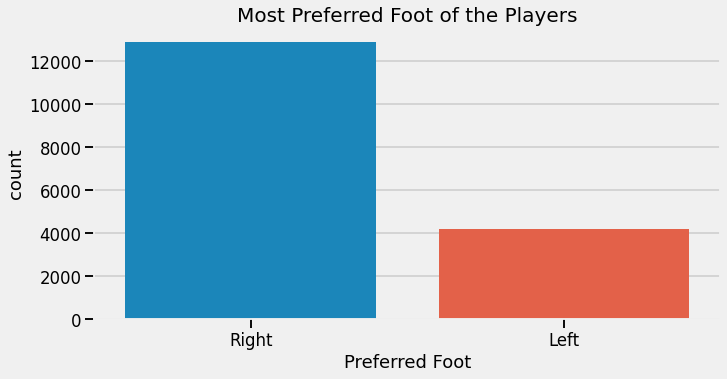

In [ ]:
# comparison of preferred foot over the different players
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(df['Preferred Foot'])
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

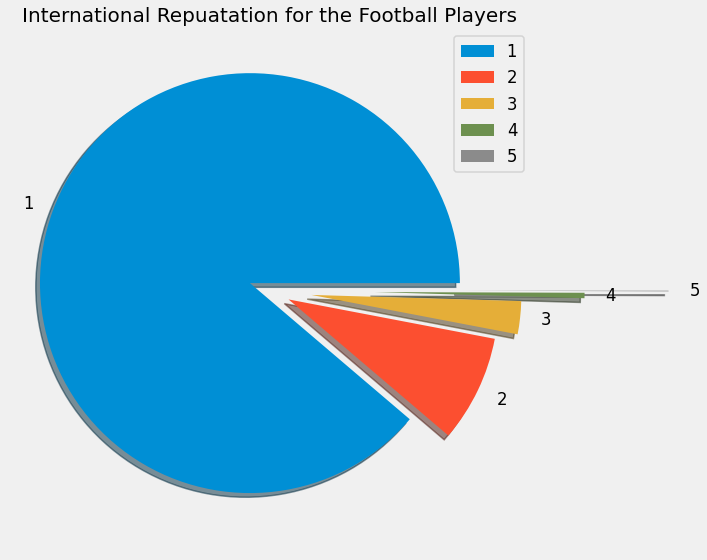

In [ ]:
# plotting a pie chart to represent share of international repuatation
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(df['International Reputation'].value_counts(), labels = ['1', '2', '3', '4', '5'], explode = [0.1, 0.1, 0.2, 0.5, 0.9], shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()

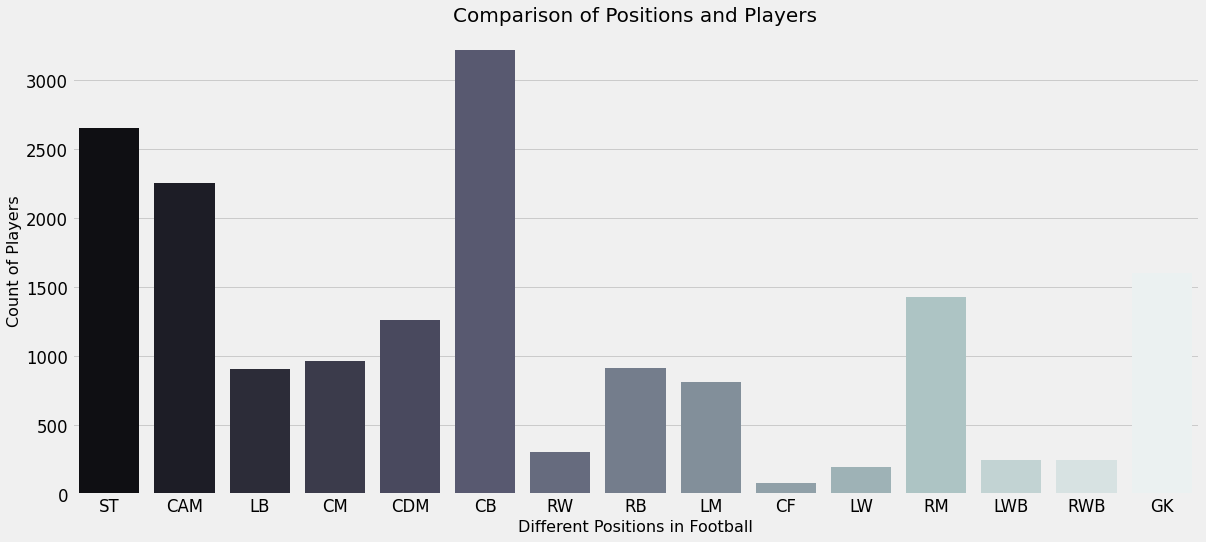

In [ ]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Best Position', data = df, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

In [ ]:
# Comparing the players' Wages


In [ ]:
#  Weights of players amoung different nations



In [ ]:
#  Wages of players amoung different nations
from wordcloud import WordCloud 


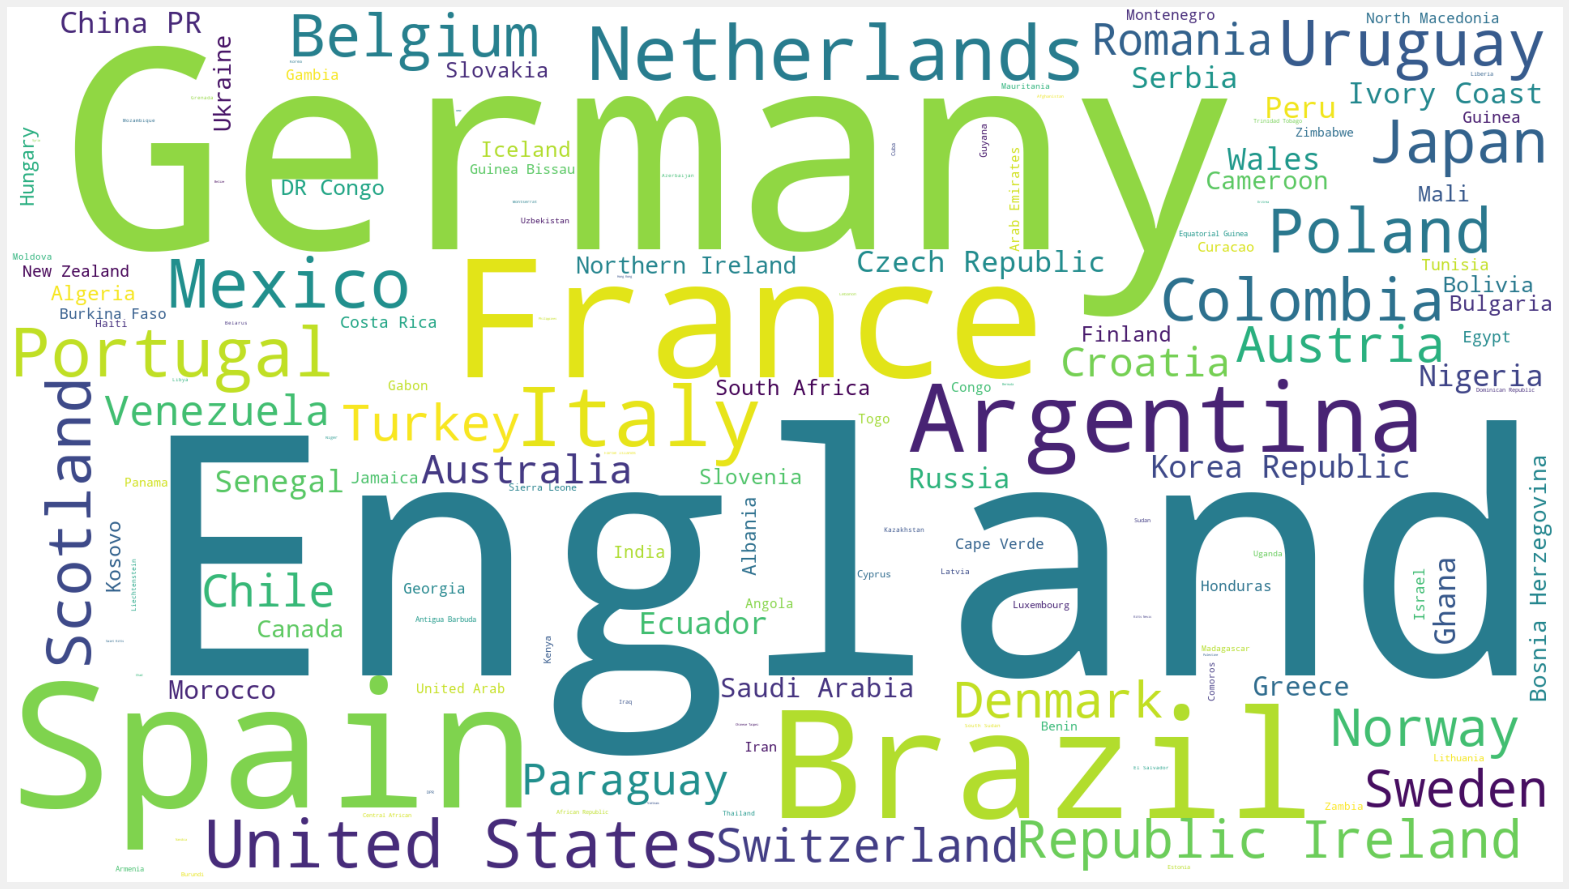

In [ ]:
#WordCloud Of Nationality
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [ ]:
df.sample()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness,Value_int,Wage_int
12514,190530,T. Fontaine,29,Madagascar,68,68,FC Lorient,€750K,€11K,1498,Left,1.0,2.0,2.0,Low/ Medium,Normal (170-185),5.0,"Jul 30, 2019",2022,182.88,78.0,60.0,18.0,67.0,65.0,19.0,18.0,26.0,29.0,51.0,60.0,74.0,67.0,35.0,67.0,64.0,38.0,83.0,64.0,80.0,17.0,64.0,71.0,40.0,35.0,45.0,61.0,66.0,67.0,9.0,13.0,7.0,8.0,7.0,CB,68.0,€1.5M,64.0,750000,11000


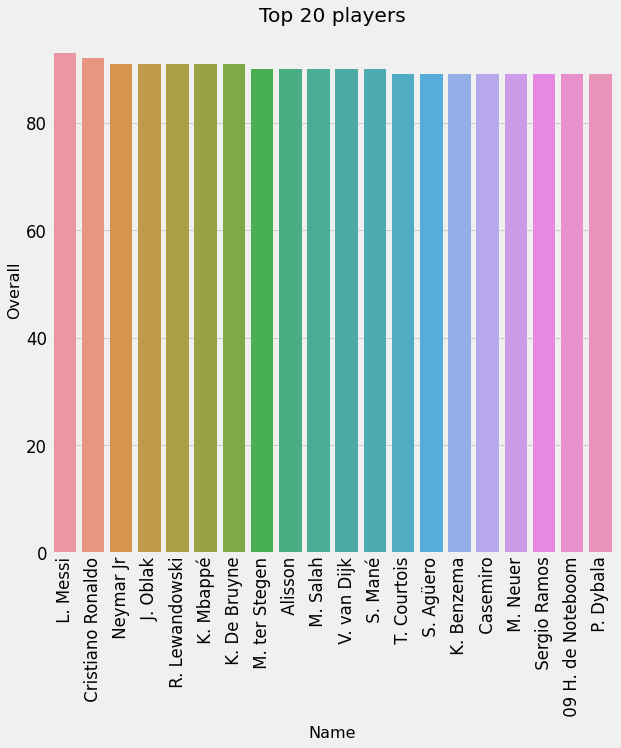

In [ ]:
# Top 20 players overall
df_temp = pd.DataFrame({'Name': df["Name"],'Best Overall Rating': df["Best Overall Rating"]})
df_temp = df_temp.sort_values(ascending= False,by='Best Overall Rating') 
ax= sns.barplot(x=df_temp.Name.head(20), y= df_temp['Best Overall Rating'].head(20))
plt.xticks(rotation= 90)
plt.xlabel('Name', size = 16) 
plt.ylabel('Overall', size = 16)
plt.title('Top 20 players') 
plt.show()

ValueError: ignored

In [ ]:

# Most Valuable Players
value = list(df["Value"]) 

name = df["Name"]

data = pd.DataFrame({ 'PlayerValue' : value,'PlayerName':name})

x = data.PlayerName.head(100)
value_y = data.PlayerValue.head(100) # value_y = footballer value(30 players)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))

sns.pointplot(x=x,y=value_y,color='black',alpha=0.9) # alpha = transparency(0) or opacity(1)

plt.xticks(rotation= 90) # Position of text on the x-axis

plt.xlabel('Footballer Name',fontsize = 25,color='green') # x-axis name

plt.ylabel('Values',fontsize = 25,color='green') # y-axis name

plt.title('2021 Most Valuable Player ',fontsize = 30,color='green') # title
plt.grid()